In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#can run this if working in the same folder as the data
def read_data(survey_section, discipline, dataset):
    ''' Loads UCUES datasets present in the Data Mural Project GitHub Data Folder and returns the dataset as a pandas
    dataframe
    
    Params:
        survey_section  str, Shortened section name, ex: Satis 
        discipline    str, Shortened discipline name, ex: Hum
        dataset    int, the sub-dataset from the specified survey section 
    '''
    #Creates the path for where the file is located in the local environment
    file_path = "{}_data_{}_{}.csv".format(survey_section, discipline, dataset)
    DF = pd.read_csv(file_path, encoding='utf-16le', sep = '\t')
    return DF

In [3]:
def read_data_from_file_path(file_path, UCUES_dataset, survey_section, discipline, dataset):
    ''' Loads UCUES datasets present in the Data Mural Project GitHub Data Folder and returns the dataset as a pandas
    dataframe
    
    Params:
        file_path     str, file_path to the dataset on your local environment, ex: /Users/omarramos/Documents/Data_Mural_Project/Data
        UCUES_dataset   str, name of the UCUES survey section and sub-dataset number, ex: Satisfaction-1
        survey_section  str, Shortened section name, ex: Satis 
        discipline    str, Shortened discipline name, ex: Hum
        dataset    int, the sub-dataset from the specified survey section 
    '''
    #Creates the path for where the file is located in the local environment
    file_path = "{}/Data/UCUES-{}/{}_data_{}_{}.csv".format(file_path, UCUES_dataset,survey_section, discipline, dataset)
    DF = pd.read_csv(file_path, encoding='utf-16le', sep = '\t')
    return DF

In [4]:
#read_data("Satis", "Arts", 1)
read_data_from_file_path("/Users/emilylopez/Desktop/data_mural/data_mural_proj","Satisfaction-1", "Satis", "Arts", 1).head()

,Label1,Pivot Field Values,Calculation1,Total
0,Top campus administrators are genuinely commit...,6,17%,27
1,"Knowing what I know now, I would still choose ...",6,31%,50
2,I feel valued as an individual at this institu...,6,14%,22
3,I feel that I belong at this university,6,19%,31
4,Faculty are genuinely committed to promoting r...,6,27%,42


In [5]:
# example for how to use the function to open datasets for different disciplines for the same section
disciplines = ["Arts", "Hum", "Life", "Eng", "Health", "Phys", "Prof", "Social", "Undec"]
dataset = 1
survey_section = "Satis"
file_path = "/Users/emilylopez/Desktop/data_mural/data_mural_proj"
UCUES_dataset = "Satisfaction-1"

array_dfs = []
for discipline in disciplines:
    df = read_data_from_file_path(file_path, UCUES_dataset, survey_section, discipline, dataset)
    df[discipline] = [discipline for i in range(len(df))]
    array_dfs.append(df)

## Datasets: Satisfaction 

Likert Scale: Strongly Disagree (1), Disagree (2), Somewhat Disagree (3), Somewhat Agree (4), Agree (5), Strongly Agree (6)

In [6]:
array_dfs[1].merge(array_dfs[2], how = "outer")

,Label1,Pivot Field Values,Calculation1,Total,Hum,Life
0,Top campus administrators are genuinely commit...,6,11%,61,Hum,NaN
1,"Knowing what I know now, I would still choose ...",6,39%,220,Hum,NaN
2,I feel valued as an individual at this institu...,6,12%,67,Hum,NaN
3,I feel that I belong at this university,6,24%,134,Hum,NaN
4,Faculty are genuinely committed to promoting r...,6,20%,112,Hum,NaN
...,...,...,...,...,...,...
79,I feel valued as an individual at this institu...,1,6%,69,NaN,Life
80,I feel that I belong at this university,1,4%,46,NaN,Life
81,Faculty are genuinely committed to promoting r...,1,2%,23,NaN,Life
82,Channels for expressing discrimination or hara...,1,4%,49,NaN,Life


In [7]:
# the dataframes are stacked on eachother
concat_dfs_1_2 = pd.concat([array_dfs[1],array_dfs[2]])
concat_dfs_1_2

,Label1,Pivot Field Values,Calculation1,Total,Hum,Life
0,Top campus administrators are genuinely commit...,6,11%,61,Hum,NaN
1,"Knowing what I know now, I would still choose ...",6,39%,220,Hum,NaN
2,I feel valued as an individual at this institu...,6,12%,67,Hum,NaN
3,I feel that I belong at this university,6,24%,134,Hum,NaN
4,Faculty are genuinely committed to promoting r...,6,20%,112,Hum,NaN
...,...,...,...,...,...,...
37,I feel valued as an individual at this institu...,1,6%,69,NaN,Life
38,I feel that I belong at this university,1,4%,46,NaN,Life
39,Faculty are genuinely committed to promoting r...,1,2%,23,NaN,Life
40,Channels for expressing discrimination or hara...,1,4%,49,NaN,Life


In [8]:
len(pd.concat(array_dfs))

378

In [9]:
len(array_dfs[1]) # 42 entries in each
len(array_dfs) #9 disciplines
42 * 9 # results in our concat table

378

### Creating new merged dataframe of all the disciplines

In [10]:
#same as merging each dataframe
concat_df = pd.concat(array_dfs)
concat_df

,Label1,Pivot Field Values,Calculation1,Total,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec
0,Top campus administrators are genuinely commit...,6,17%,27,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Knowing what I know now, I would still choose ...",6,31%,50,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I feel valued as an individual at this institu...,6,14%,22,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I feel that I belong at this university,6,19%,31,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Faculty are genuinely committed to promoting r...,6,27%,42,Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,I feel valued as an individual at this institu...,1,4%,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undec
38,I feel that I belong at this university,1,4%,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undec
39,Faculty are genuinely committed to promoting r...,1,2%,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undec
40,Channels for expressing discrimination or hara...,1,4%,180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Undec


#### One-Hot encode discipline columns to make them easier to plot

In [11]:
concat_df = concat_df.fillna(0) #convert NaNs to 0

for discipline in disciplines:
    concat_df.loc[concat_df[discipline] == discipline, discipline] = 1
concat_df

,Label1,Pivot Field Values,Calculation1,Total,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec
0,Top campus administrators are genuinely commit...,6,17%,27,1,0,0,0,0,0,0,0,0
1,"Knowing what I know now, I would still choose ...",6,31%,50,1,0,0,0,0,0,0,0,0
2,I feel valued as an individual at this institu...,6,14%,22,1,0,0,0,0,0,0,0,0
3,I feel that I belong at this university,6,19%,31,1,0,0,0,0,0,0,0,0
4,Faculty are genuinely committed to promoting r...,6,27%,42,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,I feel valued as an individual at this institu...,1,4%,199,0,0,0,0,0,0,0,0,1
38,I feel that I belong at this university,1,4%,173,0,0,0,0,0,0,0,0,1
39,Faculty are genuinely committed to promoting r...,1,2%,87,0,0,0,0,0,0,0,0,1
40,Channels for expressing discrimination or hara...,1,4%,180,0,0,0,0,0,0,0,0,1


In [12]:
# Get one hot encoding of column with scores
one_hot = pd.get_dummies(concat_df['Pivot Field Values'])
# Drop column with scores as it is now encoded
one_hot_df = concat_df.drop('Pivot Field Values',axis = 1)
# Join the encoded df
one_hot_df = one_hot_df.join(one_hot)
one_hot_df

,Label1,Calculation1,Total,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec,1,2,3,4,5,6
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [13]:
one_hot_df = one_hot_df.rename(columns = {"Label1": "Statement", "Calculation1": "Percent_pop", "Total": "Pop_raw_count"})
one_hot_df

,Statement,Percent_pop,Pop_raw_count,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec,1,2,3,4,5,6
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
41,"At UC, I have been excluded from study groups ...",31%,1409,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [14]:
#drop duplicate rows
new_df = one_hot_df.drop_duplicates()
#reset index
new_df = new_df.reset_index()
new_df

,index,Statement,Percent_pop,Pop_raw_count,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec,1,2,3,4,5,6
0,0,Top campus administrators are genuinely commit...,17%,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Top campus administrators are genuinely commit...,11%,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Top campus administrators are genuinely commit...,10%,123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Top campus administrators are genuinely commit...,12%,239,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,Top campus administrators are genuinely commit...,10%,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,41,"At UC, I have been excluded from study groups ...",29%,38,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
374,41,"At UC, I have been excluded from study groups ...",35%,238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
375,41,"At UC, I have been excluded from study groups ...",29%,234,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
376,41,"At UC, I have been excluded from study groups ...",31%,473,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [15]:
for x in range(len(new_df["Percent_pop"])):
    new_df["Percent_pop"][x] = float(new_df["Percent_pop"][x].replace("%", ""))/100
new_df

/var/folders/w4/mykv87ns3h3blj3jw28kzwd80000gn/T/ipykernel_5761/4051690931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Percent_pop"][x] = float(new_df["Percent_pop"][x].replace("%", ""))/100


,index,Statement,Percent_pop,Pop_raw_count,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec,1,2,3,4,5,6
0,0,Top campus administrators are genuinely commit...,0.17,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Top campus administrators are genuinely commit...,0.11,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Top campus administrators are genuinely commit...,0.1,123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Top campus administrators are genuinely commit...,0.12,239,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,Top campus administrators are genuinely commit...,0.1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,41,"At UC, I have been excluded from study groups ...",0.29,38,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
374,41,"At UC, I have been excluded from study groups ...",0.35,238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
375,41,"At UC, I have been excluded from study groups ...",0.29,234,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
376,41,"At UC, I have been excluded from study groups ...",0.31,473,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [16]:
new_df

,index,Statement,Percent_pop,Pop_raw_count,Arts,Hum,Life,Eng,Health,Phys,Prof,Social,Undec,1,2,3,4,5,6
0,0,Top campus administrators are genuinely commit...,0.17,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,Top campus administrators are genuinely commit...,0.11,61,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,Top campus administrators are genuinely commit...,0.1,123,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,Top campus administrators are genuinely commit...,0.12,239,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,Top campus administrators are genuinely commit...,0.1,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,41,"At UC, I have been excluded from study groups ...",0.29,38,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
374,41,"At UC, I have been excluded from study groups ...",0.35,238,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
375,41,"At UC, I have been excluded from study groups ...",0.29,234,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
376,41,"At UC, I have been excluded from study groups ...",0.31,473,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


## Exploratory Data Analysis

In [17]:
test_arts = new_df[["index","Statement", "Percent_pop", "Pop_raw_count","Arts", 1,2,3,4,5,6]].where(new_df["Arts"] == 1).dropna()
test_arts.head()

,index,Statement,Percent_pop,Pop_raw_count,Arts,1,2,3,4,5,6
0,0.0,Top campus administrators are genuinely commit...,0.17,27.0,1,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,"Knowing what I know now, I would still choose ...",0.31,50.0,1,0.0,0.0,0.0,0.0,0.0,1.0
18,2.0,I feel valued as an individual at this institu...,0.14,22.0,1,0.0,0.0,0.0,0.0,0.0,1.0
27,3.0,I feel that I belong at this university,0.19,31.0,1,0.0,0.0,0.0,0.0,0.0,1.0
36,4.0,Faculty are genuinely committed to promoting r...,0.27,42.0,1,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
test_arts = test_arts.groupby("Statement").agg({"index": "first", "Percent_pop": "sum", "Pop_raw_count": "sum", 
                                                1: "first", 2:"first", 3:"first", 4:"first", 5:"first", 6:"first"})
test_arts

,index,Percent_pop,Pop_raw_count,1,2,3,4,5,6
Statement,,,,,,,,,
"At UC, I have been excluded from study groups because of my group membership",6.0,1.00,159.0,0.0,0.0,0.0,0.0,0.0,1.0
Channels for expressing discrimination or harassment complaints are readily available to students at UC,5.0,1.00,157.0,0.0,0.0,0.0,0.0,0.0,1.0
Faculty are genuinely committed to promoting respect for and understanding of group differences at UC,4.0,1.01,158.0,0.0,0.0,0.0,0.0,0.0,1.0
I feel that I belong at this university,3.0,1.01,160.0,0.0,0.0,0.0,0.0,0.0,1.0
I feel valued as an individual at this institution,2.0,1.01,160.0,0.0,0.0,0.0,0.0,0.0,1.0
"Knowing what I know now, I would still choose to enroll at this campus",1.0,1.02,160.0,0.0,0.0,0.0,0.0,0.0,1.0
Top campus administrators are genuinely committed to promoting respect for and understanding of group differences at UC,0.0,0.99,156.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
statements = new_df.groupby("Statement").agg({"index": "first", "Percent_pop": "sum", "Pop_raw_count": "sum", 
                                                1: "sum", 2:"sum", 3:"sum", 4:"sum", 5:"sum", 6:"sum"})
statements.reset_index()

,Statement,index,Percent_pop,Pop_raw_count,1,2,3,4,5,6
0,"At UC, I have been excluded from study groups ...",6,9.01,11674,9,9,9,9,9,9
1,Channels for expressing discrimination or hara...,5,8.98,11618,9,9,9,9,9,9
2,Faculty are genuinely committed to promoting r...,4,9.03,11634,9,9,9,9,9,9
3,I feel that I belong at this university,3,9.01,11749,9,9,9,9,9,9
4,I feel valued as an individual at this institu...,2,9.01,11751,9,9,9,9,9,9
5,"Knowing what I know now, I would still choose ...",1,8.99,11753,9,9,9,9,9,9
6,Top campus administrators are genuinely commit...,0,9.02,11633,9,9,9,9,9,9


There are 7 different Statements, which is in line with the 0-6 indices. There are 9 disciplines so there are 9 entries for each likert scale value. The percent population for each discipline should be 1 and since there are 9 disciplines, it makes sense that the Percent_pop sums to around 9 (9.0) also. The Pop_raw_count shows how many students responded to each question; they are roughly similar.

To see how many responded for a single discipline, look at **test_art** dataframe.

### Graphing the Data

Looking at the data across all disciplines 

In [20]:
#plotting data for first statement:
stat1 = new_df["Statement"][0]
stat1

'Top campus administrators are genuinely committed to promoting respect for and understanding of group differences at  UC'

In [21]:
stat1_df = new_df.where(new_df["Statement"] == stat1).dropna()
#how many people across all discplines relate to question on likert scale 1-6
stat1_all = stat1_df.groupby([1,2,3,4,5,6]).sum().drop(columns = "index") 
stat1_all = stat1_all["Pop_raw_count"].reset_index()
stat1_all["Score"] = pd.get_dummies([6,5,4,3,2,1]).idxmax(1)
stat1_all

,1,2,3,4,5,6,Pop_raw_count,Score
0,0.0,0.0,0.0,0.0,0.0,1.0,1323.0,6
1,0.0,0.0,0.0,0.0,1.0,0.0,3751.0,5
2,0.0,0.0,0.0,1.0,0.0,0.0,3962.0,4
3,0.0,0.0,1.0,0.0,0.0,0.0,1378.0,3
4,0.0,1.0,0.0,0.0,0.0,0.0,728.0,2
5,1.0,0.0,0.0,0.0,0.0,0.0,491.0,1


In [22]:
stat1_all = stat1_all.drop(columns = [1,2,3,4,5,6])
stat1_all

,Pop_raw_count,Score
0,1323.0,6
1,3751.0,5
2,3962.0,4
3,1378.0,3
4,728.0,2
5,491.0,1


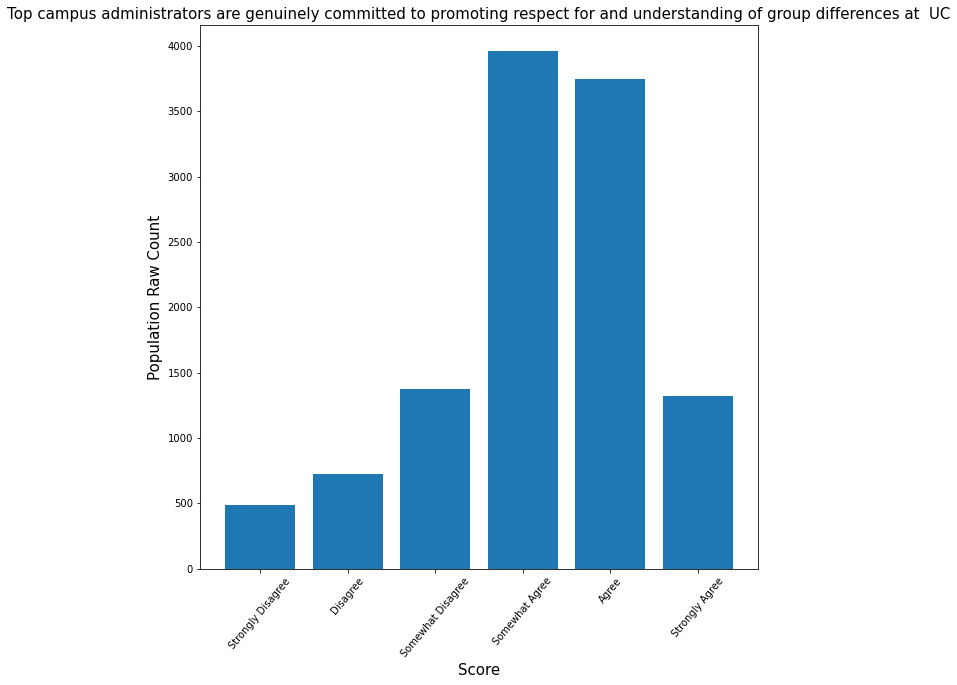

In [23]:
plt.figure(figsize=(10,10))
plt.bar(stat1_all["Score"], stat1_all["Pop_raw_count"])
plt.xlabel("Score", fontsize = 15)
plt.ylabel("Population Raw Count", fontsize = 15)
plt.title(stat1, fontsize = 15)

plt.xticks([1,2,3,4,5,6], ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Somewhat Agree"
                           ,"Agree" , "Strongly Agree"], rotation=50);  # Set text labels and properties.

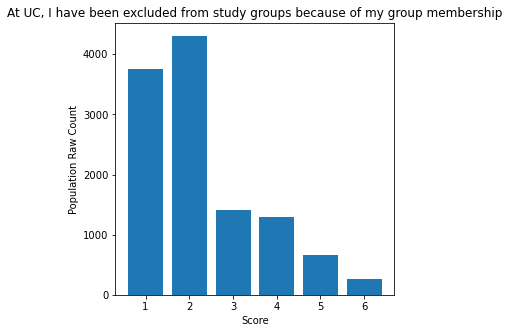

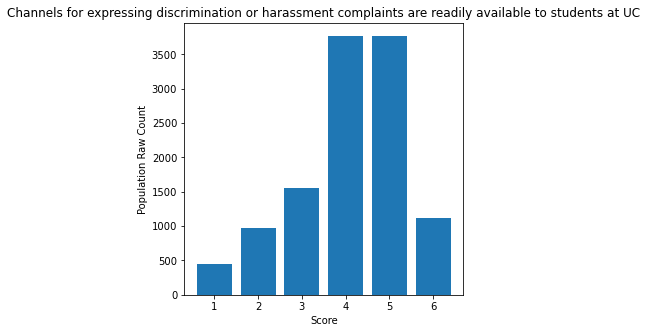

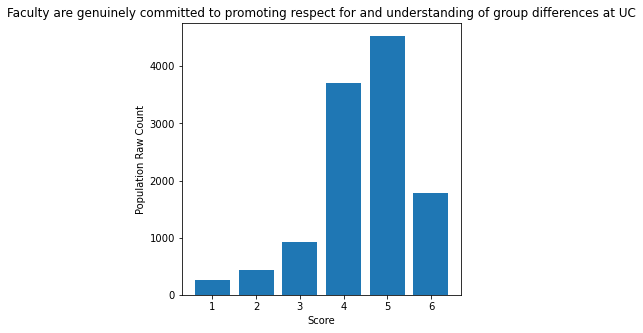

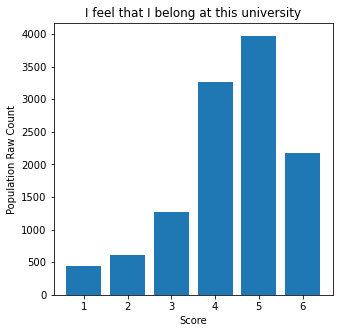

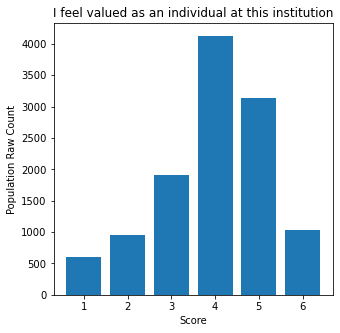

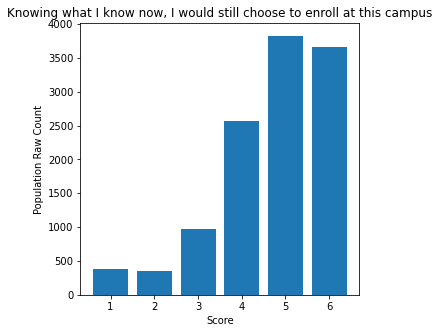

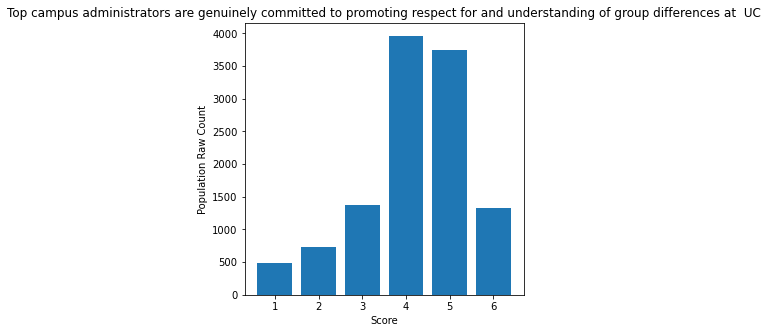

In [24]:
stats_df = statements.reset_index()
for stat in range(len(stats_df)):
    stat1 = stats_df["Statement"][stat]
    stat1_df = new_df.where(new_df["Statement"] == stat1).dropna()
    stat1_all = stat1_df.groupby([1,2,3,4,5,6]).sum().drop(columns = "index") 
    stat1_all = stat1_all["Pop_raw_count"].reset_index().drop(columns = [1,2,3,4,5,6])
    stat1_all["Score"] = pd.get_dummies([6,5,4,3,2,1]).idxmax(1)
    
    plt.figure(figsize=(5,5))
    plt.bar(stat1_all["Score"], stat1_all["Pop_raw_count"])
    plt.xlabel("Score")
    plt.ylabel("Population Raw Count")
    plt.title(stat1)

   # plt.xticks([1,2,3,4,5,6], ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Somewhat Agree"
                         #      ,"Agree" , "Strongly Agree"], rotation=50);  # Set text labels and properties.

Looking at data for specific disciplines

In [25]:
#sns.lineplot(data = new_df, x = )
new_df["Discipline"] = disciplines * 42
plot_df = new_df[["Statement", "Percent_pop", "Pop_raw_count", 1,2,3,4,5,6, "Discipline"]]
plot_df

,Statement,Percent_pop,Pop_raw_count,1,2,3,4,5,6,Discipline
0,Top campus administrators are genuinely commit...,0.17,27,0,0,0,0,0,1,Arts
1,Top campus administrators are genuinely commit...,0.11,61,0,0,0,0,0,1,Hum
2,Top campus administrators are genuinely commit...,0.1,123,0,0,0,0,0,1,Life
3,Top campus administrators are genuinely commit...,0.12,239,0,0,0,0,0,1,Eng
4,Top campus administrators are genuinely commit...,0.1,13,0,0,0,0,0,1,Health
...,...,...,...,...,...,...,...,...,...,...
373,"At UC, I have been excluded from study groups ...",0.29,38,1,0,0,0,0,0,Health
374,"At UC, I have been excluded from study groups ...",0.35,238,1,0,0,0,0,0,Phys
375,"At UC, I have been excluded from study groups ...",0.29,234,1,0,0,0,0,0,Prof
376,"At UC, I have been excluded from study groups ...",0.31,473,1,0,0,0,0,0,Social


In [26]:
unique_stats = np.unique(plot_df["Statement"])
unique_stats

array(['At UC, I have been excluded from study groups because of my group membership',
       'Channels for expressing discrimination or harassment complaints are readily available to students at UC',
       'Faculty are genuinely committed to promoting respect for and understanding of group differences at UC',
       'I feel that I belong at this university',
       'I feel valued as an individual at this institution',
       'Knowing what I know now, I would still choose to enroll at this campus',
       'Top campus administrators are genuinely committed to promoting respect for and understanding of group differences at  UC'],
      dtype=object)

In [31]:
plot1 = plot_df.where(plot_df["Statement"] == unique_stats[0]).dropna()
plot1["Score_value"] = [6]*9 + [5]*9 + [4]*9 + [3]*9 + [2]*9 + [1]*9
scores = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Somewhat Agree" ,"Agree" , "Strongly Agree"]
plot1["Score"] = ["Strongly Agree"] * 9 + ["Agree"]* 9 + ["Somewhat Agree"]* 9 + ["Somewhat Disagree"]* 9 + ["Disagree"] * 9 + ["Strongly Disagree"]* 9
plot1

,Statement,Percent_pop,Pop_raw_count,1,2,3,4,5,6,Discipline,Score_value,Score
54,"At UC, I have been excluded from study groups ...",0.02,3.0,0.0,0.0,0.0,0.0,0.0,1.0,Arts,6,Strongly Agree
55,"At UC, I have been excluded from study groups ...",0.03,14.0,0.0,0.0,0.0,0.0,0.0,1.0,Hum,6,Strongly Agree
56,"At UC, I have been excluded from study groups ...",0.01,17.0,0.0,0.0,0.0,0.0,0.0,1.0,Life,6,Strongly Agree
57,"At UC, I have been excluded from study groups ...",0.02,47.0,0.0,0.0,0.0,0.0,0.0,1.0,Eng,6,Strongly Agree
58,"At UC, I have been excluded from study groups ...",0.02,3.0,0.0,0.0,0.0,0.0,0.0,1.0,Health,6,Strongly Agree
59,"At UC, I have been excluded from study groups ...",0.01,7.0,0.0,0.0,0.0,0.0,0.0,1.0,Phys,6,Strongly Agree
60,"At UC, I have been excluded from study groups ...",0.03,25.0,0.0,0.0,0.0,0.0,0.0,1.0,Prof,6,Strongly Agree
61,"At UC, I have been excluded from study groups ...",0.03,48.0,0.0,0.0,0.0,0.0,0.0,1.0,Social,6,Strongly Agree
62,"At UC, I have been excluded from study groups ...",0.02,100.0,0.0,0.0,0.0,0.0,0.0,1.0,Undec,6,Strongly Agree
117,"At UC, I have been excluded from study groups ...",0.11,17.0,0.0,0.0,0.0,0.0,1.0,0.0,Arts,5,Agree


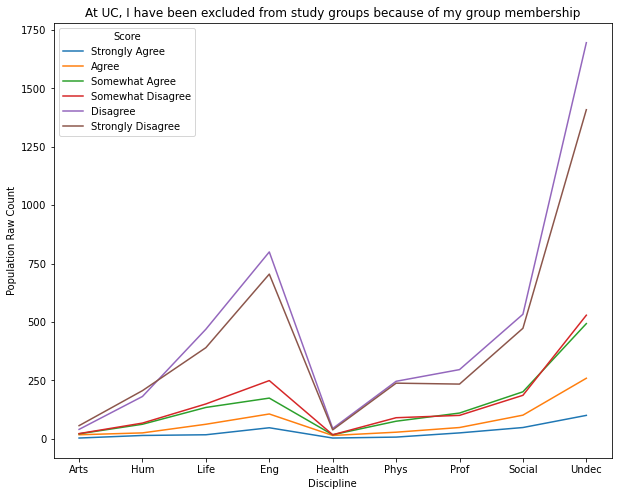

In [28]:
plt.figure(figsize = (10,8))
sns.lineplot(data = plot1, x = "Discipline", y = "Pop_raw_count", hue = "Score");
plt.title(unique_stats[0]);
plt.ylabel("Population Raw Count");

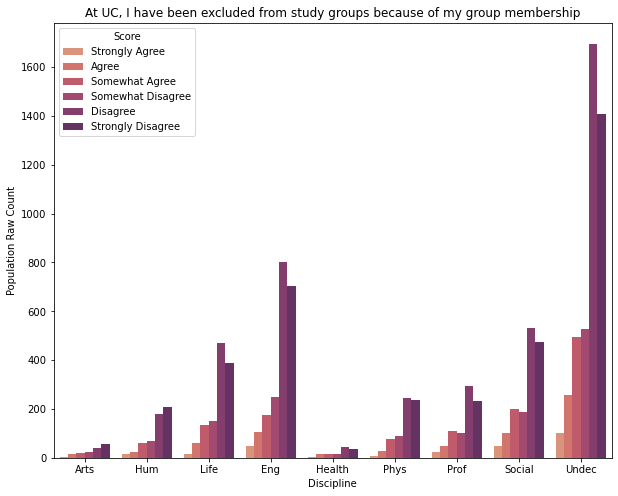

In [29]:
plt.figure(figsize = (10,8))
sns.barplot(data = plot1, x = "Discipline", y = "Pop_raw_count", hue = "Score", palette= "flare");
plt.title(unique_stats[0]);
plt.ylabel("Population Raw Count");

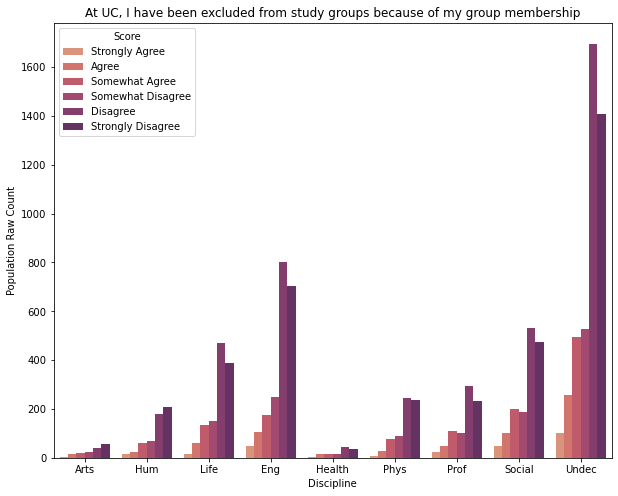

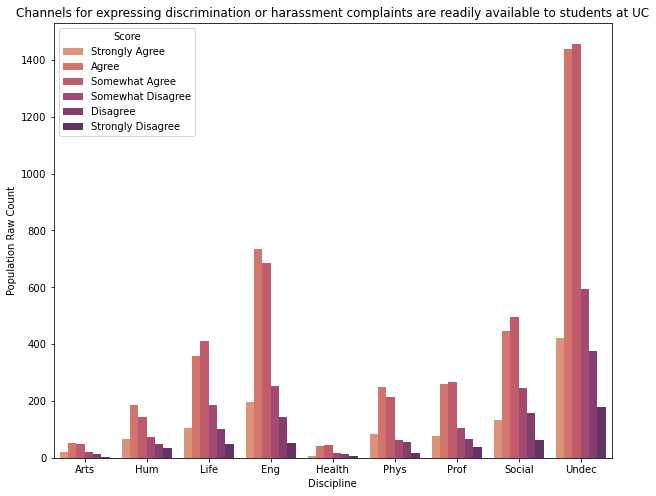

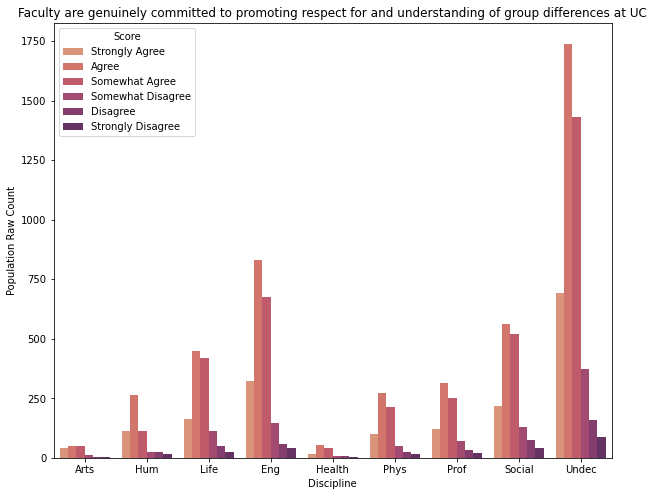

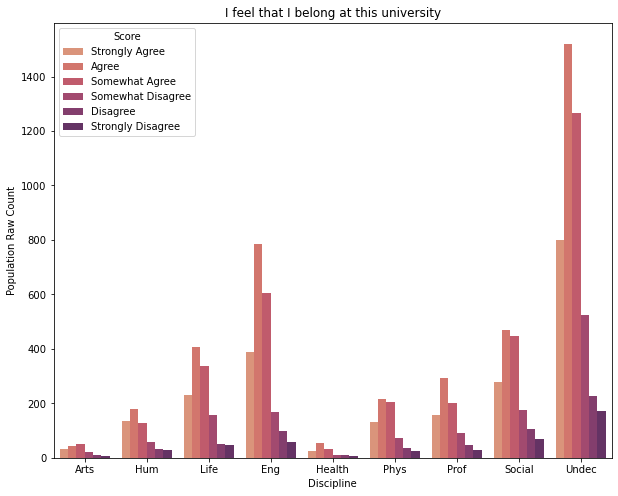

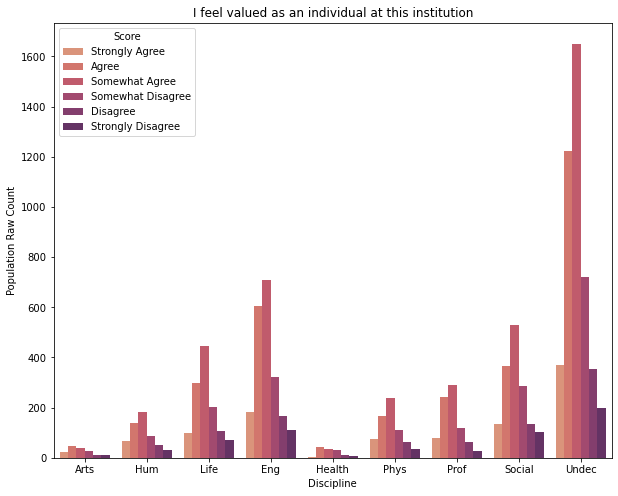

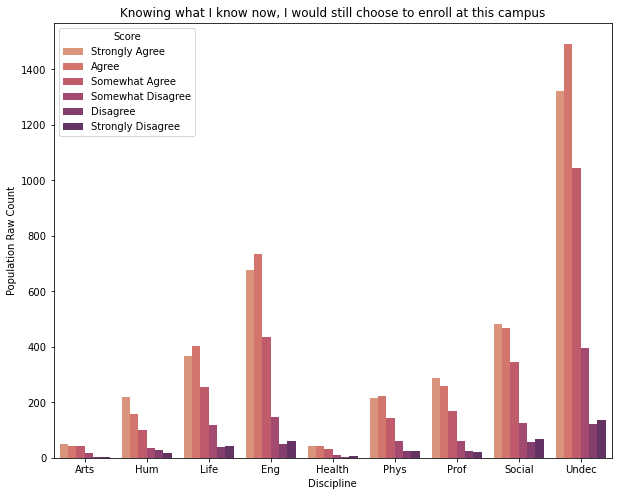

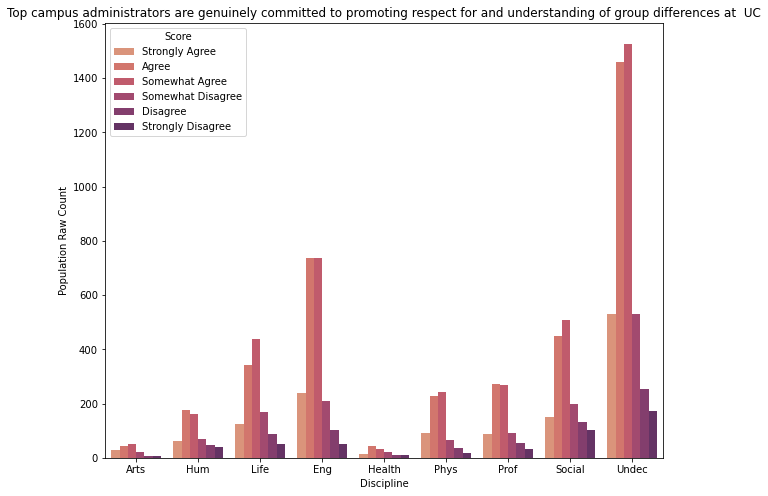

In [32]:
for i in range(len(unique_stats)):
    plot1 = plot_df.where(plot_df["Statement"] == unique_stats[i]).dropna()
    plot1["Score_value"] = [6]*9 + [5]*9 + [4]*9 + [3]*9 + [2]*9 + [1]*9
    scores = ["Strongly Disagree", "Disagree", "Somewhat Disagree", "Somewhat Agree" ,"Agree" , "Strongly Agree"]
    plot1["Score"] = ["Strongly Agree"] * 9 + ["Agree"]* 9 + ["Somewhat Agree"]* 9 + ["Somewhat Disagree"]* 9 + ["Disagree"] * 9 + ["Strongly Disagree"]* 9
    
    plt.figure(figsize = (10,8))
    sns.barplot(data = plot1, x = "Discipline", y = "Pop_raw_count", hue = "Score", palette= "flare");
    plt.title(unique_stats[i]);
    plt.ylabel("Population Raw Count");